In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory

## Data Preparation

In [2]:
training_set = image_dataset_from_directory(
    "./train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 108309 files belonging to 4 classes.


In [3]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [4]:
INPUT_SHAPE = (224, 224, 3)

In [ ]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [ ]:
model=tf.keras.models.Sequential()       

In [ ]:
model.add(tf.keras.Input(shape=INPUT_SHAPE)) 

In [8]:
model.add(mobnet)  

In [ ]:
model.add(tf.keras.layers.Dense(units=4,activation='softmax'))  

In [ ]:
metrics_list=["accuracy",tf.keras.metrics.F1Score()]         

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=metrics_list)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [17]:
training_history=model.fit(x=training_set,epochs=15)

Epoch 1/15
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 2558s 748ms/step - accuracy: 0.8747 - f1_score: 0.6560 - loss: 1.0766
Epoch 2/15
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 2512s 742ms/step - accuracy: 0.8951 - f1_score: 0.6955 - loss: 0.7250
Epoch 3/15
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 2489s 735ms/step - accuracy: 0.9411 - f1_score: 0.8880 - loss: 0.4975
Epoch 4/15
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 2492s 736ms/step - accuracy: 0.9616 - f1_score: 0.9317 - loss: 0.3558
Epoch 5/15
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 2499s 738ms/step - accuracy: 0.9675 - f1_score: 0.9428 - loss: 0.2570
Epoch 6/15
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 2512s 742ms/step - accuracy: 0.9739 - f1_score: 0.9539 - loss: 0.1860
Epoch 7/15
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 2512s 742ms/step - accuracy: 0.9788 - f1_score: 0.9625 - loss: 0.1386
Epoch 8/15
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 7026s 2s/step - accuracy: 0.9822 - f1_score: 0.9687 - loss: 0.1070
Epoch 9/15
3385/3385 ━━━━━━━━━━━━━━━━━━━━ 2527s 746ms/step - accuracy: 0.9851 - f1_score: 0.9738 - loss: 0.

In [23]:
model.save("./Trained_Eye_disease_model.h5")
model.save("Trained_Eye_disease_model.keras")

In [25]:
training_history.history

{'accuracy': [0.874682605266571,
  0.8951241374015808,
  0.9410667419433594,
  0.9615728855133057,
  0.9674911499023438,
  0.9738802909851074,
  0.9788198471069336,
  0.9821990728378296,
  0.9851443767547607,
  0.987286388874054,
  0.9886528253555298,
  0.9898715615272522,
  0.9907763600349426,
  0.99155193567276,
  0.991865873336792],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=
  array([8.7948632e-01, 7.8453529e-01, 2.3199152e-04, 9.5973969e-01],
        dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9340988 , 0.9129078 , 0.        , 0.93484616], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9604742 , 0.93282515, 0.6943791 , 0.9641237 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9668189, 0.9414152, 0.8351661, 0.983279 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9719797 , 0.9516607 , 0.86167455, 0.9856903 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype

In [ ]:
with open("training_history.pkl","wb") as f:
    import pickle
    pickle.dump(training_history.history,f)

In [2]:
import pickle
with open("training_history.pkl","rb") as f:
    load_history=pickle.load(f)
print(load_history)

{'accuracy': [0.874682605266571, 0.8951241374015808, 0.9410667419433594, 0.9615728855133057, 0.9674911499023438, 0.9738802909851074, 0.9788198471069336, 0.9821990728378296, 0.9851443767547607, 0.987286388874054, 0.9886528253555298, 0.9898715615272522, 0.9907763600349426, 0.99155193567276, 0.991865873336792], 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([8.7948632e-01, 7.8453529e-01, 2.3199152e-04, 9.5973969e-01],
      dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9340988 , 0.9129078 , 0.        , 0.93484616], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9604742 , 0.93282515, 0.6943791 , 0.9641237 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9668189, 0.9414152, 0.8351661, 0.983279 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9719797 , 0.9516607 , 0.86167455, 0.9856903 ], dtype=float32)>, <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.97826487, 0.963071

In [3]:
load_history.keys()

dict_keys(['accuracy', 'f1_score', 'loss'])

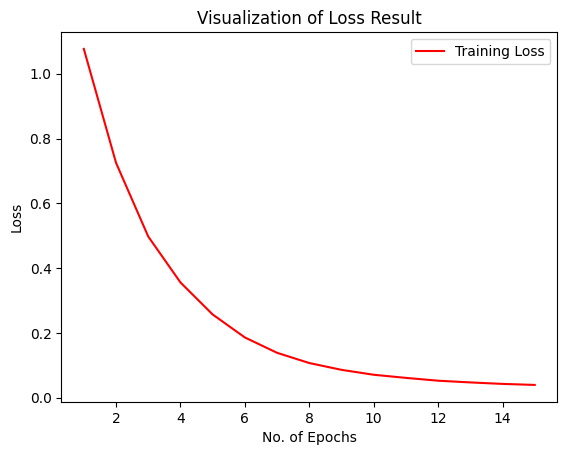

In [4]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

In [42]:
model=tf.keras.models.load_model("Trained_Eye_disease_model.keras",compile=False)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,511,436 (21.02 MB)

 Trainable params: 5,487,036 (20.93 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [43]:
test_set = image_dataset_from_directory(
    "./test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1000 files belonging to 4 classes.


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy", tf.keras.metrics.F1Score()]
)

In [45]:
test_loss,test_acc,f1_score=model.evaluate(test_set)

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.9530 - f1_score: 0.9526 - loss: 0.1913


In [46]:
test_loss,test_acc,f1_score

(0.19131818413734436,
 0.953000009059906,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9233644 , 0.98814225, 0.9090908 , 0.98993963], dtype=float32)>)

In [47]:
true_categories=tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [48]:
true_categories

<tf.Tensor: shape=(1000, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(1000, 4), dtype=float32)>

In [49]:
predicted_categories = model.predict(test_set)
predicted_categories

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step


array([[9.9319732e-01, 2.1080065e-03, 3.2497428e-03, 1.4448463e-03],
       [9.9319732e-01, 2.1080065e-03, 3.2497428e-03, 1.4448463e-03],
       [9.9319732e-01, 2.1080065e-03, 3.2497428e-03, 1.4448463e-03],
       ...,
       [7.6483906e-04, 1.7924660e-03, 2.5271389e-03, 9.9491560e-01],
       [7.7180238e-04, 1.8085850e-03, 2.5449160e-03, 9.9487466e-01],
       [7.6483760e-04, 1.7924635e-03, 2.5271329e-03, 9.9491560e-01]],
      shape=(1000, 4), dtype=float32)

In [50]:
Y_Pred = tf.argmax(predicted_categories, axis=1)
Y_Pred

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    

In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_Pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       250
           1       0.98      1.00      0.99       250
           2       0.99      0.84      0.91       250
           3       1.00      0.98      0.99       250

    accuracy                           0.95      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.96      0.95      0.95      1000



In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, Y_Pred)
cm

array([[247,   3,   0,   0],
       [  0, 250,   0,   0],
       [ 38,   1, 210,   1],
       [  0,   2,   2, 246]])

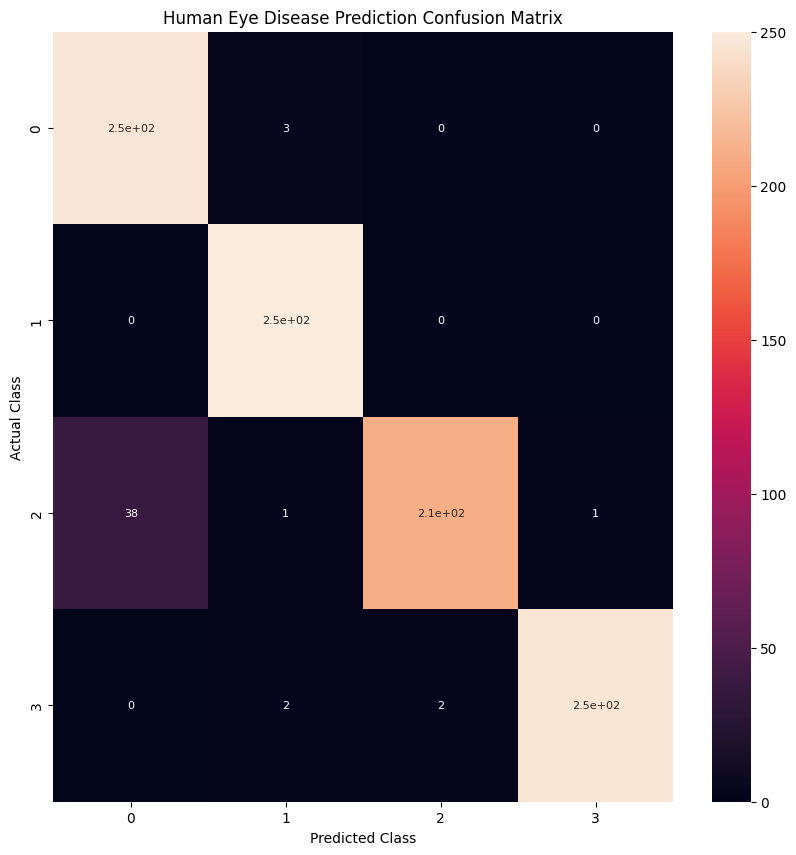

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size": 8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()